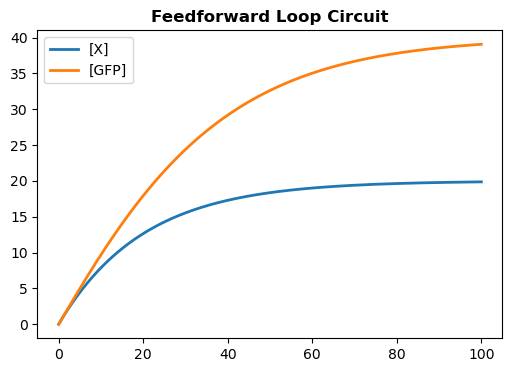

In [ ]:
import tellurium as te

model = te.loada("""
model feedforward_loop
// Species
Input = 10;
X = 0;
GFP = 0;

// Parameters
k1 = 0.1; // Input forms X (slow path)
k2 = 0.05; // X forms GFP (slow path)
k3 = 0.1; // Input directly forms GFP (fast path)
k_deg_x = 0.05; // degradation of X
k_deg_GFP = 0.05; // degradation of GFP

// Reactions
J0: -> X; k1*Input // Input slowly activates X
J1: X -> ; k_deg_x*X // X degrades over time
J2: -> GFP; (k2*X+k3*Input) // GFP made from both X and Input
J3: GFP -> ; k_deg_GFP*GFP // GFP degrades naturally
end
""")

model.simulate(0, 100, 1000)
model.plot(title="Feedforward Loop Circuit")